In [1]:
from PIL import Image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import shutil

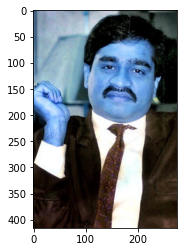

In [2]:
img = cv2.imread("./Dataset/daud/Dawood Ibrahim Kaskar.jpg")
plt.imshow(img)

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(416, 274)

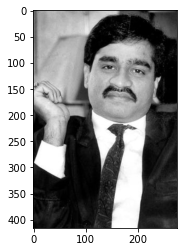

In [4]:
plt.imshow(gray , cmap='gray')

In [5]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 88,  45, 162, 162]])

In [6]:
(x,y,w,h) = faces[0]
x,y,w,h

(88, 45, 162, 162)

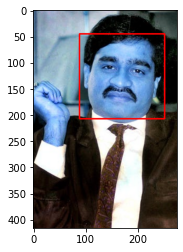

In [7]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

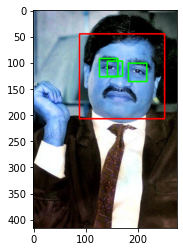

In [8]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

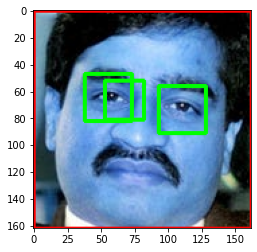

In [9]:
plt.imshow(roi_color, cmap='gray')

In [10]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

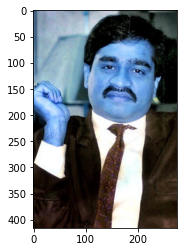

In [11]:
original_image = cv2.imread("./Dataset/daud/Dawood Ibrahim Kaskar.jpg")
plt.imshow(original_image)

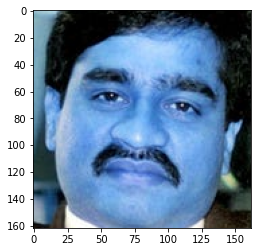

In [12]:
cropped_image = get_cropped_image_if_2_eyes("./Dataset/daud/Dawood Ibrahim Kaskar.jpg")
plt.imshow(cropped_image)

In [13]:
path_to_data = "./Dataset/"
path_to_cr_data = "./Dataset/cropped/"

In [14]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [15]:
img_dirs

['./Dataset/cropped', './Dataset/daud']

In [16]:
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)